# Introduction à la manipulation et à l'analyse d'images en Python

La manipulation et l'analise d'images en python est réaliser à l'aide du module [scikit-image](https://scikit-image.org/), qui un des nombreux projets de base de [scipy stack](https://www.scipy.org/docs.html)].  

Ce module est un dès plus utilisé pour la manipulation et l'analise d'image en python. La toute première version de scikit-image remonte à août 2009. La version actuelle, et celle utilisé dans cette démonstration de l'utilisation du module, est la version 0.18.3. Le dépot GitHub du projet scikit-image est consultable [ici](https://github.com/scikit-image).

Il est principalement utilisé pour réaliser de la segmentation, du filtrage, de la transformation que nous allons aborder au cours de cette introduction.


## contexte (william)




## objectifs (willliam)

L'objectif est d'explorer en surface le module scikit-image. Par exemple comment segmenter une image de microscopie multicellulaires pour analyser une cellule unique.
- identifier noyaux, organites, 
- filtrage objet abbérant
- mesure simple (taille, fluorescence, granulométrie)
- déterminer la corespondance cellulaire des fluorochromes

## ...


# « Images » Manipulation et analyse d'images en Python

Manipulation d’une image de microscopie avec scikit-image et analyses basiques.
  
## Questions et points à aborder ou à traiter :  

- Comment est codée informatiquement une image ?  (jeyani)
- Présenter les données : Quelles différences y a-t-il entre une image au format .tif et des formats d’images plus communs comme le .jpeg ? Quel intérêt d’utiliser le premier format en microscopie ?  (jeyani)
- Comment est composée l’image fournie dans comme donnée (différents canaux) ?  (tristan)
- Comment ouvrir et afficher l’image avec scikit-image ? (tristan)

Choisir un canal (par exemple le bleu) et extraire les principaux objets :  
    - Segmenter l’image (justifier le choix du seuil)
    - Identifier les objets et filtrer les objets aberrants  
    - Effectuer quelques mesures simples (taille, fluorescence  



### Comment est composée l'image fournie comme donnée ?

In [7]:
# import skimage
import numpy as np
from matplotlib import pyplot

In [12]:
import os

filename = os.path.join("./data", "FluorescentCells.tif")

skimage propose des fonctions permettant la gestion des données en entrée et sortie, qui sont regroupées dans le module io. En particulier, la fonction imread permet de charger une image à partir d'un fichier dont le nom est donné en argument.

<class 'numpy.ndarray'>


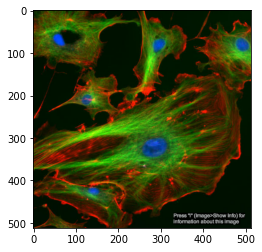

In [18]:
from skimage import io

fluocells = io.imread(filename)

print(type(fluocells))
pyplot.imshow(fluocells)

On voit que l'image importée est stockée dans un tableau numpy. 
Par conséquent, l'image peut être affichée avec n'importel quelle fonction qui lit un tableau numpy et affiche une image. Ici, nous utilisons la fonction imshow du module pyplot (bibliothèque matplotlib).

L'image est composée de trois canaux, un pour le rouge, un pour le vert, et un pour le bleu, les trois couleurs primaires. Cette image est codée dans un tableau numpy tridimensionnel : les première et deuxième dimensions correspondent aux coordonnées des pixels, la troisième dimension est composée des trois canaux rouge, vert, et bleu.

In [19]:
# extract each channel
fluocells_r = fluocells[:, :, 0] # red
fluocells_g = fluocells[:, :, 1] # green
fluocells_b = fluocells[:, :, 2] # blue

On extrait chaque canal avec son indice dans la troisième dimension du tableau numpy.

Text(0.5, 1.0, 'blue channel')

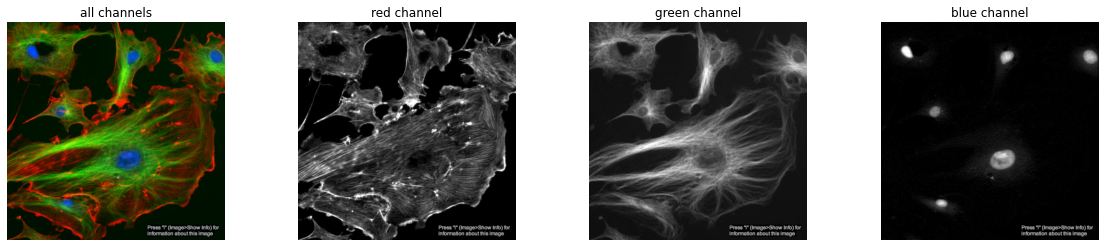

In [20]:
fig, subplots = pyplot.subplots(nrows=1, ncols=4, figsize=(20, 4))

for subp in subplots:
    subp.axis("off")

(subp_rgb, subp_r, subp_g, subp_b) = subplots

subp_rgb.imshow(fluocells)
subp_rgb.set_title("all channels")

subp_r.imshow(fluocells_r, cmap="gray")
subp_r.set_title("red channel")

subp_g.imshow(fluocells_g, cmap="gray")
subp_g.set_title("green channel")

subp_b.imshow(fluocells_b, cmap="gray")
subp_b.set_title("blue channel")

On affiche l'image correspondant à chaque canal en niveaux de gris, afin de pourvoir comparer (...). Avec carte de couleur, plus la valeur associée à un pixel est grande, plus l'intensité est élevée. 

Dans le canal bleu par exemple, on distingue clairement les noyaux colorés au DAPI.